### Sumário

1. [Introdução](#1.-Introdução)
2. [Exemplo](#2.-Exemplo)
3. [ExemploPython](#3.-ExemploPython)

## 1. Introdução

Compreendemos que os sinais amostrados por equipamentos são discretos:

<p style="text-align:center">$ f_{j} = [f_{0},f_{1},f_{2},\dots,f_{N}] $ </p>

Para cada tempo $t$, temos um valor de $f_{j}$; 

<p style="text-align:center">$ t_{j} = [t_{0},t_{1},t_{2},\dots,t_{N}] $ </p>

<p style="text-align:center">$ f_{j} = f(t_{j}) $ </p>

Cada valor é espaçado por $\Delta t$:

<p style="text-align:center">$t_{j} = t_{0} + j\Delta t $ </p>

<p style="text-align:center">$ \Delta t > 0 $ </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

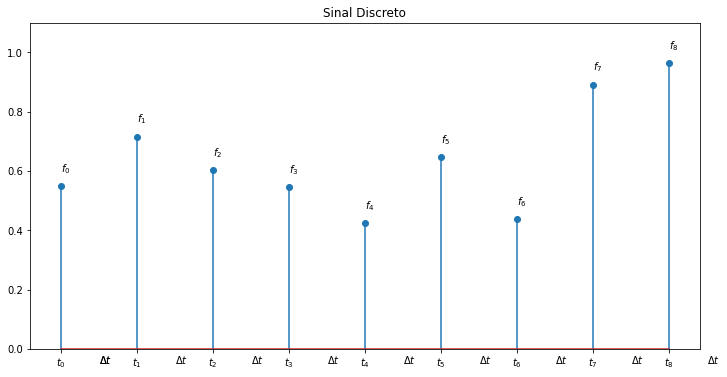

In [2]:
t = [0,1,2,3,4,5,6,7,8] #criando um array de tempos
np.random.seed(0) #definindo uma seed para o random ser o mesmo sempre
fj = np.random.rand(len(t)) #criando uma função fj a partir de números aleatórios

fig, ax = plt.subplots(figsize=(12,6))
ax.stem(t,fj)

tick_list = []
f_list = []

for i in range(len(t)):
    tick = "$t_{%i}$"%(i)
    f = "$f_{%i}$"%(i)
    tick_list.append(tick)
    f_list.append(f)

ax.set_xticks(t)
ax.set_xticklabels(tick_list)

for i in range(len(f_list)):
    ax.text(i,(fj[i]+0.05),f_list[i])
    ax.text((i+0.5),-0.05,"$\Delta t$")
    
ax.text(0.5,-0.05,"$\Delta t$")
    
plt.ylim(0,1.1)
plt.title("Sinal Discreto")

plt.show()

Para dados contínuos, definimos a transformada de Fourier como 

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} f(t) e^{-i \omega t} dt$ </p>

Ao tratarmos de dados discretos, não podemos mais aplicar a integral. Devemos agora buscar uma abordagem que utilize um somatório. Podemos aproximar para sinais discretos:

<p style="text-align:center">$\hat{f}(\omega) \approx \displaystyle \sum_{j=0}^{N-1} f(t_{j}) e^{-i \omega t_{j}} \Delta t$ </p>

<p style="text-align:center">$\hat{f}(\omega) \approx \Delta t \displaystyle \sum_{j=0}^{N-1} f(t_{j}) e^{-i \omega t \Delta j} $ </p>

Para definir a Transformada de Fourier Discreta, temos que encontrar um $\hat{f}(\omega_{k})$ para cada $f(t_{j})$.

Temos $N$ amostras e sabemos que $\omega$ deve ser menor que a frequência de Nyquist $\omega_{c}$: 

<p style="text-align:center"> $-\dfrac{\pi}{\Delta t} <\omega_c < \dfrac{\pi}{\Delta t}$ </p>

Então, 

<p style="text-align:center"> $ \Delta \omega = \dfrac{2\pi}{\Delta t/N} = \dfrac{2\pi}{N\Delta t} = \dfrac{2}{N} \omega_{c} $ </p>

<p style="text-align:center"> $ \omega_{k} = k \Delta \omega $ </p>

Assim, podemos definir

<p style="text-align:center"> $ \hat{f}(\omega_{k}) = \Delta t \displaystyle \sum_{j=0}^{N-1} f_{j} e^{(i2\pi/N)^{(-jk)}} $ </p>

Lembrando que a raiz enésima da unidade $\omega_{N} $ é

<p style="text-align:center"> $ \omega_{N} = e^{(i2\pi/N)}  $ </p>

Temos a Transformada de Fourier Discreta:

<p style="text-align:center"> $ \hat{f}(\omega_{k}) = \Delta t \displaystyle \sum_{j=0}^{N-1} f_{j} \omega_{N}^{-jk} $ </p>,


em que $N$ é o número de amostras, $j$ é o índice da amostra atual, $k$ é o índice da frequência atual e $f_{j}$ é o valor da amostra em $j$.

- Se $N$ for ímpar, $X_1$, $X_2$, $\dots$, $X_{(N-1)/2}$ contém os termos de frequência positiva e $X_{(N+1)/2}$, $\dots$, $X_{N-1}$ contém os termos de frequência negativa.
- Se $N$ for par, $X_1$, $X_2$ $\dots$, $X_{(N/2) - 1}$ contém os termos de frequência positiva e $X_{N/2}$, $\dots$, $X_{N-1}$ contém os termos de frequência negativa.
- No caso de um sinal de entrada real, a parte das frequências positivas da DFT é o conjugado da parte negativa, e assim o espectro vai ser simétrico. Portanto, geralmente plotamos apenas a DFT correspondendo às frequências positivas. Por este motivo, é comum utilizarmos a função ``rfft`` nos nossos códigos, que traduzimos como a "parte real da transformada de Fourier".


******

## 2. Exemplo

$f(t) = cos(t)$

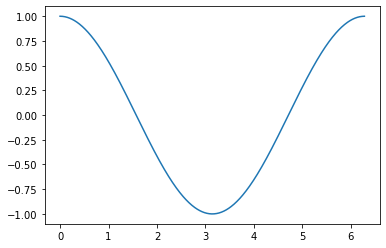

In [3]:
t = np.arange(0,2*np.pi,0.01) #criando um sinal "contínuo" para visualizar nossa função
cos = np.cos(t) 

plt.plot(t,cos)
plt.show()

Vamos discretizar esse sinal usando os seguintes parâmetros:

$\Delta t = \dfrac{\pi}{2}$

$ N = 4 $

Assim, temos 4 amostras espaçadas por $\pi/2$ segundos.

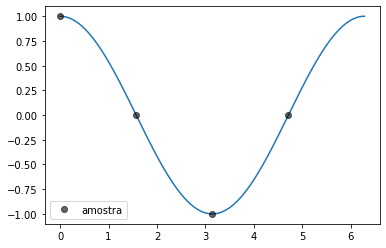

In [9]:
plt.plot(t,cos)
plt.plot(0,1,"ok",alpha=0.6,label="amostra")
plt.plot(np.pi/2,0,"ok",alpha=0.6)
plt.plot(np.pi,-1,"ok",alpha=0.6)
plt.plot(3*np.pi/2,0,"ok",alpha=0.6)
plt.legend()
plt.show()

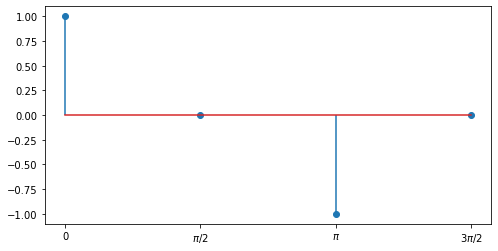

In [14]:
fj = [1,0,-1,0]
tj = [0,np.pi/2,np.pi,3*np.pi/2]

fig, ax = plt.subplots(figsize=(8,4))
ax.stem(tj,fj)

tick_list = ["0", "$\pi/2$", "$\pi$", "$3\pi/2$"]

ax.set_xticks(tj)
ax.set_xticklabels(tick_list)

plt.show()

Frequência de Nyquist $\omega_{c} = \dfrac{\pi}{\Delta t} = \dfrac{\pi}{\pi/2} =2 $

$ \omega_{N} = \omega_{4} = e^{i2\pi/4} = i$

<p style="text-align:center"> $ \hat{f}(\omega_{k}) = \Delta t \displaystyle \sum_{j=0}^{N-1} f_{j} \omega_{N}^{-jk} $ </p>

<p style="text-align:center"> $ \hat{f}(\omega_{k}) = \Delta t \displaystyle \sum_{j=0}^{N-1} f_{j} \cdot i^{-jk} $ </p>

<p style="text-align:center"> $ \tilde{f}(\omega_{k}) = \displaystyle \sum_{j=0}^{N-1} f_{j} \cdot i^{-jk} $ </p>

<p style="text-align:center"> $ \tilde{f}(\omega_{k}) = 1\cdot (i)^0 + 0 \cdot (i)^-k + (-1)(i)^-2k + 0 \cdot (i)^-3k $ </p>

<p style="text-align:center"> $ \tilde{f}(\omega_{k}) = 1 - (-1)^k $ </p>

<p style="text-align:center"> $ \tilde{f}(\omega_{k}) = [0,2,0,2] $ </p>

<p style="text-align:center"> $ \hat{f} = \Delta t \tilde{f} $ </p>

<p style="text-align:center"> $ \hat{f} = \pi/2 \cdot \tilde{f} = [0,\pi,0,\pi] $ </p>

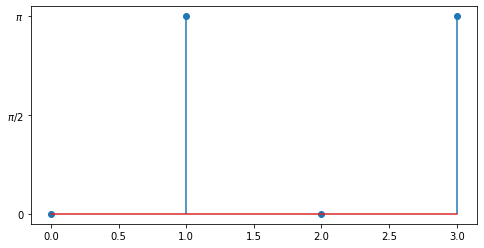

In [18]:
f_dft = [0,np.pi,0,np.pi]

y = [0,np.pi/2,np.pi]
y_ticks = ["0", "$\pi/2$", "$\pi$"]

fig, ax = plt.subplots(figsize=(8,4))
ax.stem(f_dft)

ax.set_yticks(y)
ax.set_yticklabels(y_ticks)

plt.show()

A função ``fftshift`` joga os dois últimos pontos para as frequências negativas para obter o resultado da Transformada de Fourier do cosseno que obtivemos algebricamente.

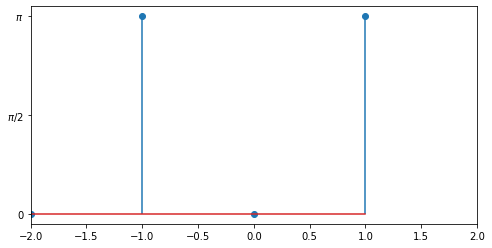

In [20]:
t_shift = [-2,-1,0,1]
f_shift = [0,np.pi,0,np.pi]

fig, ax = plt.subplots(figsize=(8,4))
ax.stem(t_shift,f_shift)

ax.set_yticks(y)
ax.set_yticklabels(y_ticks)

plt.xlim([-2,2])
plt.show()

## 3. ExemploPython

Vamos criar um sinal discreto

In [22]:
T = 10 #segundos
N = 500 #número de amostras

t = np.linspace(0,T,N)
dt = (t[1] - t[0])

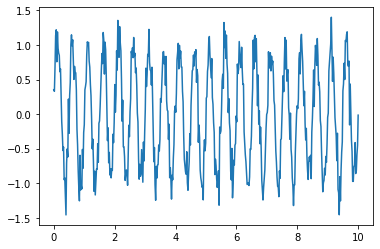

In [23]:
#Criando o sinal com ruído

np.random.seed(0) #definindo seed para reprodução dos resultados

f1 = 2 #frequência do sinal 

signal_puro = np.sin(2*np.pi*f1*t) #sinal sem ruído
signal = signal_puro + 0.2*np.random.randn(len(signal_puro)) #adicionando ruído

plt.plot(t,signal)
plt.show()

In [24]:
def DFT(x):
    """
    Função que calcula a Transformada de Fourier Discreta para um array.
    Entrada: x - array
    Saída: dft - array
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    dft = np.dot(e, x)
    
    return dft

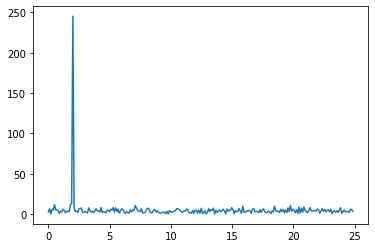

In [25]:
#Calculando a DFT para nosso sinal:

dft_signal = DFT(signal)
f = np.fft.fftfreq(len(t),dt) #vetor de frequências

#Vamos plotar somente a primeira metade já que o sinal é real
plt.plot(f[:N//2],np.abs(dft_signal[:N//2]))
plt.show()

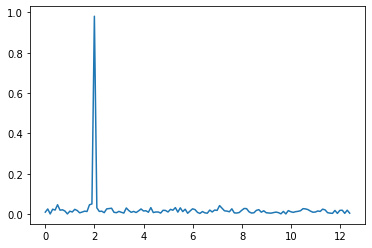

In [30]:
#Podemos normalizar o sinal

X_norm = dft_signal[:N//4]/(N//2)

plt.plot(f[:N//4], np.abs(X_norm))
plt.show()

Assim, recuperamos o pico na frequência = 2 de nosso sinal.

*********

Futuramente, iremos estudar a ``fft`` (fast-fourier transform). 
Como curiosidade, vamos comparar o tempo de nossa DFT com a FFT:

In [31]:
%timeit DFT(signal)

44.8 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit np.fft.fft(signal)

25.9 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Exemplo 2 - Interpolação Sinc

Suponha que tenhamos amostrado um sinal $s(t)$ corretamente, levando em consideração a frequência de Nyquist, o teorema de Shannon e evitando Alias. É possível aumentar a resolução do nosso sinal, ou seja, recuperar valores em pontos não amostrados?

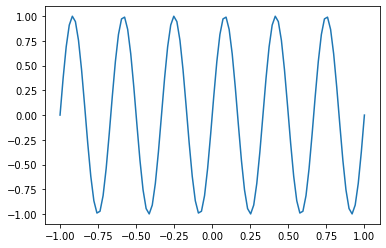

In [2]:
f = 3.0 #Hz, frequencia do meu sinal
t =np.linspace(-1,1,100) # simulando um dominio continuo
g = np.sin(2*np.pi*f*t)

plt.plot(t,g)
plt.show()

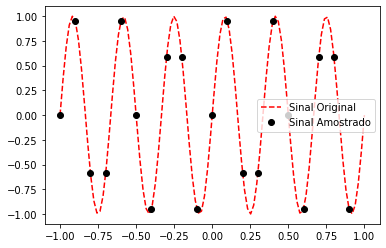

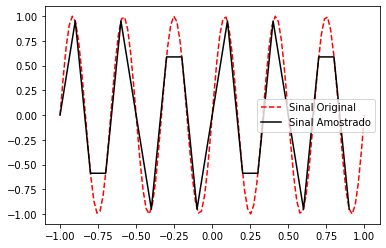

In [4]:
fs = 10.0 #Hz, taxa de amostragem
dt = 1/fs

ts = np.arange(-1,1,dt) #pontos das amostras
gs = np.sin(2*np.pi*f*ts)

plt.plot(t,g,'--r',label="Sinal Original")
plt.plot(ts,gs,"ok",label="Sinal Amostrado")
plt.legend()
plt.show()

plt.plot(t,g,'--r',label="Sinal Original")
plt.plot(ts,gs,"k",label="Sinal Amostrado")
plt.legend()
plt.show()

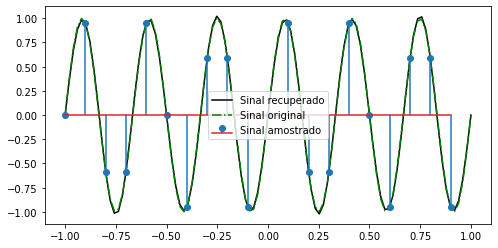

In [15]:
C = len(ts)

def sinc_interpolation(C,fs,t,gs):
    """
    Recupera amostras para um sinal amostrado adequadamente.
    """
    signal = 0
    for n in range(-C,C):
        signal += np.sinc(fs*t - n)*gs[n]
    return signal

sm = sinc_interpolation(C,fs,t,gs)

plt.figure(figsize=(8,4))
plt.plot(t,sm,'k',label='Sinal recuperado')
plt.plot(t,g,'-.g',label='Sinal original')
plt.stem(ts,gs,label='Sinal amostrado')
plt.legend()
plt.show()

#### Exemplo 3 - Aliasing

Vamos analisar um caso em que não amostramos o sinal corretamente, sem levar em consideração a frequência de Nyquist e teorema de Shannon.

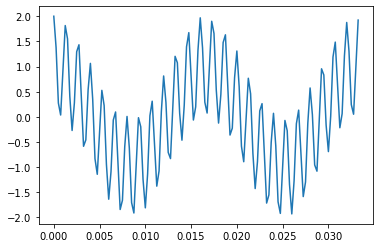

In [20]:
frequencia_sinal = 4000
taxa = 1/frequencia_sinal
t = np.arange(0,2/60,taxa) #criando o sinal contínuo

s1 = np.cos(2*np.pi*60*t)
s2 = np.cos(2*np.pi*750*t)

s = s1 + s2

plt.plot(t,s)
plt.show()

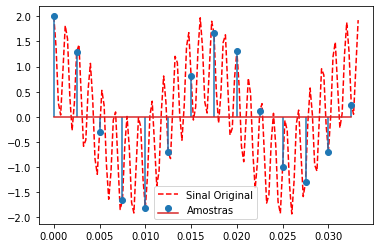

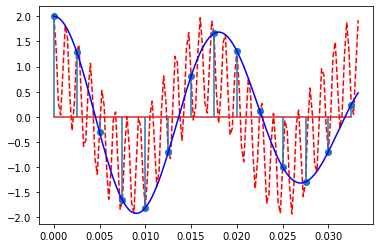

In [23]:
taxa_amostragem = 1/400 
ts = np.arange(0,2/60,taxa_amostragem) #amostrando o sinal original com taxa de amostram inadequada

ss1 = np.cos(2*np.pi*60*ts)
ss2 = np.cos(2*np.pi*750*ts)

ss = ss1 + ss2

s_alias = s1 + np.cos(2*np.pi*50*t)

plt.plot(t,s,'--r',label="Sinal Original")
plt.stem(ts,ss,label="Amostras")
plt.legend()
plt.show()

plt.plot(t,s,'--r')
plt.stem(ts,ss)
plt.plot(t,s_alias,'b')
plt.show()

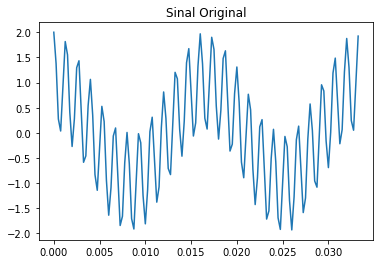

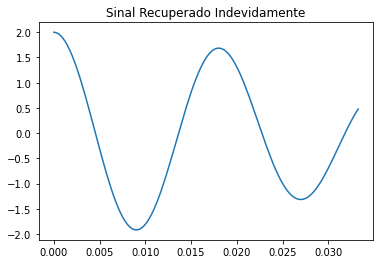

In [21]:
plt.plot(t,s)
plt.title("Sinal Original")
plt.show()

plt.plot(t,s_alias)
plt.title("Sinal Recuperado Indevidamente")
plt.show()